DonorsChoose

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
How to focus volunteer time on the applications that need the most assistance
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd
from keras.layers import Input, Embedding, LSTM, Dense,Concatenate,Dropout
from keras.models import Model
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense,Flatten
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from numpy import zeros
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD
from google.colab import drive
from zipfile import ZipFile
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle
from keras.layers import LeakyReLU
from sklearn import preprocessing
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras import regularizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#archive  = ZipFile('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove.42B.300d.zip', 'r')
#data= archive.open('glove.42B.300d.txt','r')

In [0]:
#data = open('/content/drive/My Drive/glove_vectors2.txt', 'r')

In [0]:
project_data=pd.read_csv("/content/drive/My Drive/Assignments_DonorsChoose_2018/preprocessed_data.csv")

In [0]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [0]:
project_data_resources=pd.read_csv("/content/drive/My Drive/Assignments_DonorsChoose_2018/resources.csv")

In [0]:
#price_data = project_data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
project_data_resources.shape

(1541272, 4)

In [0]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [0]:
x_train,X_test,y_train,Y_test=train_test_split(project_data,project_data['project_is_approved'],test_size=0.2,random_state=42)
X_train,X_cv,Y_train,Y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [0]:
t = Tokenizer()
t.fit_on_texts(X_train['essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train['essay'])
print(encoded_docs)
# pad documents to a max length of 4 words
#max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=300, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[  106    76 19532 ...     0     0     0]
 [   78    48  1097 ...     0     0     0]
 [    4     1    95 ...     0     0     0]
 ...
 [   25     3   921 ...     0     0     0]
 [    4     3   232 ...     0     0     0]
 [    2     8    40 ...     0     0     0]]


In [0]:
with open('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# for train
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix[i] = embedding_vector

In [0]:
encoded_docs_test = t.texts_to_sequences(X_test['essay'])
print(encoded_docs_test)
# pad documents to a max length of 4 words
#max_length = 4
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=300, padding='post')
print(padded_docs_test)
# load the whole embedding into memory


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   38  1502     1 ...     0     0     0]
 [21017   349  8120 ...     0     0     0]
 [   14    77   570 ...     0     0     0]
 ...
 [    2  1389     1 ...     0     0     0]
 [   14   273     3 ...     0     0     0]
 [ 2487  3241  6694 ...     0     0     0]]


In [0]:
encoded_docs_cv = t.texts_to_sequences(X_cv['essay'])
print(encoded_docs_cv)
# pad documents to a max length of 4 words
#max_length = 4
padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=300, padding='post')
print(padded_docs_cv)
# load the whole embedding into memory


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[    4     1  2097 ...     0     0     0]
 [  306  1340   321 ...     0     0     0]
 [   29    30    23 ...     0     0     0]
 ...
 [   25     3    83 ...     0     0     0]
 [  281   111 10497 ...     0     0     0]
 [    2    49   112 ...     0     0     0]]


In [0]:
# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
Input_Essay = Input(shape=(300,),  name='Input_Essay')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
embedding_essay = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300,trainable = False)(Input_Essay)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence

#lr= LeakyReLU(alpha = 0.3)(embedding_essay)
lstm_out = LSTM(300,return_sequences=True)(embedding_essay)
flatten_Essay = Flatten()(lstm_out)


School_State

In [0]:
le_school_state = preprocessing.LabelEncoder()
Label_encoded_school_state=le_school_state.fit_transform(X_train['school_state'])
Label_encoded_school_state_cv=le_school_state.transform(X_cv['school_state'])
Label_encoded_school_state_test=le_school_state.transform(X_test['school_state'])

In [0]:
padded_docs_school_state=Label_encoded_school_state
padded_docs_cv_school_state=Label_encoded_school_state_cv
padded_docs_test_school_state=Label_encoded_school_state_test

In [0]:
vocab_size_school_state = le_school_state.classes_

In [0]:
vocab_size_school_state_len=len(vocab_size_school_state)

In [0]:
Input_School_State_1 = Input(shape=(1,),  name='Input_School_State')

embedding_school_state_1=Embedding(vocab_size_school_state_len, 32, input_length=1)(Input_School_State_1)
flatten_School_State_1 = Flatten()(embedding_school_state_1)

teacher_prefix

In [0]:
le_teacher_prefix = preprocessing.LabelEncoder()
Label_encoded_teacher_prefix=le_teacher_prefix.fit_transform(X_train['teacher_prefix'])

In [0]:
Label_encoded_teacher_prefix_cv=le_teacher_prefix.transform(X_cv['teacher_prefix'])

In [0]:
Label_encoded_teacher_prefix_test=le_teacher_prefix.transform(X_test['teacher_prefix'])

In [0]:
padded_docs_teacher_prefix=Label_encoded_teacher_prefix
padded_docs_cv_teacher_prefix=Label_encoded_teacher_prefix_cv
padded_docs_test_teacher_prefix=Label_encoded_teacher_prefix_test

In [0]:
vocab_size_teacher_prefix_len=len(le_teacher_prefix.classes_)

In [0]:
Input_teacher_prefix_1 = Input(shape=(1,),  name='Input_teacher_prefix_1')

embedding_teacher_prefix_1=Embedding(vocab_size_teacher_prefix_len, 32, input_length=1)(Input_teacher_prefix_1)
flatten_teacher_prefix_1 = Flatten()(embedding_teacher_prefix_1)

grade_category

In [0]:
le_grade_category = preprocessing.LabelEncoder()
Label_encoded_grade_category=le_grade_category.fit_transform(X_train['project_grade_category'])

In [0]:
Label_encoded_grade_category_cv=le_grade_category.transform(X_cv['project_grade_category'])

In [0]:
Label_encoded_grade_category_test=le_grade_category.transform(X_test['project_grade_category'])
vocab_size_grade_category_len=len(le_grade_category.classes_)

In [0]:
padded_docs_project_grade_category=Label_encoded_grade_category
padded_docs_cv_project_grade_category=Label_encoded_grade_category_cv
padded_docs_test_project_grade_category=Label_encoded_grade_category_test

In [0]:
Input_grade_category_1 = Input(shape=(1,),  name='Input_grade_category_1')
embedding_grade_category_1=Embedding(vocab_size_grade_category_len, 32, input_length=1)(Input_grade_category_1)
flatten_grade_category_1 = Flatten()(embedding_grade_category_1)

clean_categories

In [0]:
le_clean_categories = preprocessing.LabelEncoder()
Label_encoded_clean_categories=le_clean_categories.fit_transform(X_train['clean_categories'])

In [0]:
Label_encoded_clean_categories_cv=le_clean_categories.transform(X_cv['clean_categories'])

In [0]:
Label_encoded_clean_categories_test=le_clean_categories.transform(X_test['clean_categories'])

In [0]:
padded_docs_clean_categories=Label_encoded_clean_categories
padded_docs_cv_clean_categories=Label_encoded_clean_categories_cv
padded_docs_test_clean_categories=Label_encoded_clean_categories_test

In [0]:
vocab_size_grade_category_len=len(le_clean_categories.classes_)

In [0]:
Input_clean_categories_1 = Input(shape=(1,),  name='Input_clean_categories_1')

embedding_clean_categories_1=Embedding(vocab_size_grade_category_len, 32, input_length=1)(Input_clean_categories_1)
flatten_clean_categories_1 = Flatten()(embedding_clean_categories_1)

clean_subcategories

In [0]:
clean_subcategories_dict=dict()
#clean_subcategories_dict.
i=1
for sent in X_train['clean_subcategories']:
    if sent not in clean_subcategories_dict:
        clean_subcategories_dict[sent]=i
        i=i+1

In [0]:
vocab_size_clean_subcategories=len(clean_subcategories_dict)

In [0]:
Label_clean_subcategories=[]
for sent in X_train['clean_subcategories']:
    try:
        Label_clean_subcategories.append(clean_subcategories_dict[sent])
      
    except:
        Label_clean_subcategories.append(0)
        
padded_docs_clean_subcategories = Label_clean_subcategories   

In [0]:
padded_docs_clean_subcategories = np.asarray(padded_docs_clean_subcategories)

In [0]:
#Label_encoded_clean_subcategories_test
padded_docs_cv_clean_subcategories=[]
Label_encoded_clean_subcategories_cv=[]
for sent in X_cv['clean_subcategories']:
    try:
        Label_encoded_clean_subcategories_cv.append(clean_subcategories_dict[sent])
      
    except:
        Label_encoded_clean_subcategories_cv.append(0)

padded_docs_cv_clean_subcategories=Label_encoded_clean_subcategories_cv

In [0]:
padded_docs_cv_clean_subcategories = np.asarray(padded_docs_cv_clean_subcategories)

In [0]:
#Label_encoded_clean_subcategories_test
padded_docs_test_clean_subcategories=[]
Label_encoded_clean_subcategories_test=[]
for sent in X_test['clean_subcategories']:
    try:
        Label_encoded_clean_subcategories_test.append(clean_subcategories_dict[sent])
      
    except:
        Label_encoded_clean_subcategories_test.append(0)
        

padded_docs_test_clean_subcategories=Label_encoded_clean_subcategories_test

In [0]:
padded_docs_clean_subcategories = np.asarray(padded_docs_clean_subcategories)
padded_docs_test_clean_subcategories=np.asarray(padded_docs_test_clean_subcategories)

In [0]:
Input_clean_subcategories_1 = Input(shape=(1,), name='Input_clean_subcategories_1')
  
embedding_clean_subcategories_1=Embedding(vocab_size_clean_subcategories, 28, input_length=1)(Input_clean_subcategories_1)
flatten_clean_subcategories_1 = Flatten()(embedding_clean_subcategories_1)

teacher_number_of_previously_posted_projects

In [0]:
rem_input_train = np.concatenate((X_train['price'].values.reshape(-1,1),X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
rem_input_cv =    np.concatenate((X_cv['price'].values.reshape(-1,1),X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
rem_input_test = np.concatenate((X_test['price'].values.reshape(-1,1),X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)

In [0]:
#from sklearn.preprocessing import StandardScalar
mms = StandardScaler().fit(rem_input_train)
rem_input_train_norm = mms.transform(rem_input_train)
rem_input_cv_norm = mms.transform(rem_input_cv)
rem_input_test_norm = mms.transform(rem_input_test)

In [0]:
remaining_input = Input(shape=(2,), name='remaining_input')
dense_1 = Dense(1, activation='relu',kernel_initializer="uniform")(remaining_input)

In [0]:
y = Concatenate()([flatten_Essay, flatten_School_State_1,flatten_teacher_prefix_1,flatten_grade_category_1,flatten_clean_categories_1,flatten_clean_subcategories_1,dense_1])

In [0]:
y = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(y)
y=  Dropout(0.3)(y)


y = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(y)
y=  Dropout(0.3)(y)
y = BatchNormalization()(y)

y = Dense(20, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(y)
y=  Dropout(0.3)(y)

y = Dense(20, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(y)
y=  Dropout(0.3)(y)






main_output = Dense(1, activation='sigmoid', name='main_output')(y)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
def auc(y_true,y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
learning_rate = 0.001
decay_rate = learning_rate / 10
#optimizers.Adam,optimizers.Nadam,optimizers.RMSprop
#from keras.optimizers import Adam
model = Model(inputs=[Input_Essay,Input_School_State_1,Input_teacher_prefix_1,Input_grade_category_1,Input_clean_categories_1,Input_clean_subcategories_1,remaining_input], outputs=[main_output])
#adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#lr=0.01,
#decay=decay_rate
adam = optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=[auc])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Essay (InputLayer)        (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     14217900    Input_Essay[0][0]                
__________________________________________________________________________________________________
Input_School_State (InputLayer) (None, 1)            0                                            
__________________________________________________________________________________________________
Input_teacher_prefix_1 (InputLa (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
model_1=model.fit([padded_docs, padded_docs_school_state,padded_docs_teacher_prefix,padded_docs_project_grade_category,padded_docs_clean_categories,padded_docs_clean_subcategories,rem_input_train_norm],Y_train,epochs=10 ,batch_size=512,validation_data=([padded_docs_cv,padded_docs_cv_school_state,padded_docs_cv_teacher_prefix,padded_docs_cv_project_grade_category,padded_docs_cv_clean_categories,padded_docs_cv_clean_subcategories,rem_input_cv_norm], Y_cv))



Train on 69918 samples, validate on 17480 samples
Epoch 1/10
69918/69918 [==============================] - 65s 930us/step - loss: 0.8545 - auc: 0.5316 - val_loss: 0.6359 - val_auc: 0.6506
Epoch 2/10
69918/69918 [==============================] - 64s 914us/step - loss: 0.6163 - auc: 0.6026 - val_loss: 0.5799 - val_auc: 0.6856
Epoch 3/10
69918/69918 [==============================] - 64s 909us/step - loss: 0.5346 - auc: 0.6644 - val_loss: 0.5495 - val_auc: 0.7317
Epoch 4/10
69918/69918 [==============================] - 64s 919us/step - loss: 0.4971 - auc: 0.6958 - val_loss: 0.5087 - val_auc: 0.7445
Epoch 5/10
69918/69918 [==============================] - 64s 919us/step - loss: 0.4721 - auc: 0.7186 - val_loss: 0.4814 - val_auc: 0.7508
Epoch 6/10
69918/69918 [==============================] - 64s 911us/step - loss: 0.4500 - auc: 0.7339 - val_loss: 0.4465 - val_auc: 0.7569
Epoch 7/10
69918/69918 [==============================] - 64s 910us/step - loss: 0.4498 - auc: 0.7404 - val_loss: 

In [0]:
import pickle 
filename = '/content/drive/My Drive/model/donor_model1.pkl'
saved_model = pickle.dump(model,open('/content/drive/My Drive/donor_model1.pkl','wb')) 

In [0]:
model_history=model.predict([padded_docs_test,padded_docs_test_school_state,padded_docs_test_teacher_prefix,padded_docs_test_project_grade_category,padded_docs_test_clean_categories,padded_docs_test_clean_subcategories,rem_input_test_norm])

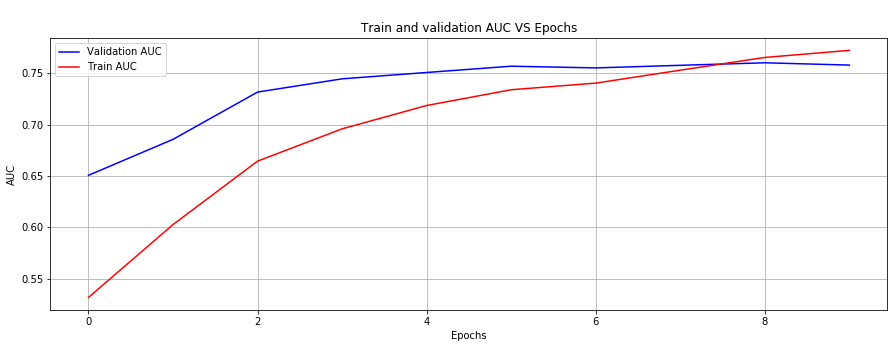

In [0]:
x = list(range(10))
vy = model_1.history['auc']
ty = model_1.history['val_auc']
plt.figure(figsize=(15,5))
plt.plot(x, ty, 'b', label="Validation AUC")
plt.plot(x, vy, 'r', label="Train AUC")
plt.xlabel('Epochs') 
plt.ylabel('AUC')
plt.title('\nTrain and validation AUC VS Epochs')
plt.legend()
plt.grid()
plt.show()

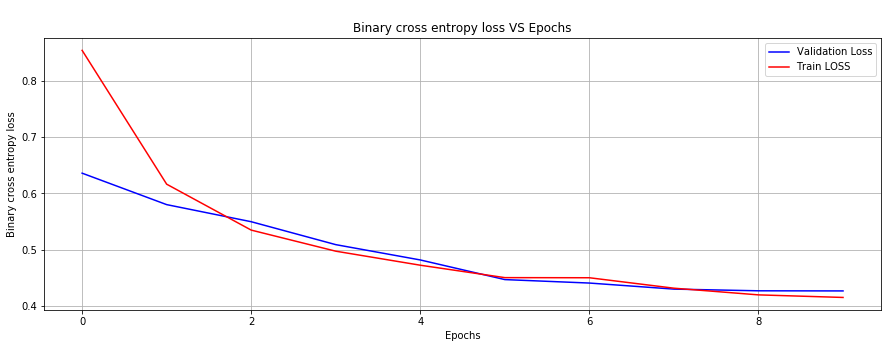

In [0]:
import matplotlib.pyplot as plt

x = list(range(10))
vy = model_1.history['loss']
ty = model_1.history['val_loss']
plt.figure(figsize=(15,5))
plt.plot(x, ty, 'b', label="Validation Loss")
plt.plot(x, vy, 'r', label="Train LOSS")
plt.xlabel('Epochs') 
plt.ylabel('Binary cross entropy loss')
plt.title('\nBinary cross entropy loss VS Epochs')
plt.legend()
plt.grid()
plt.show()

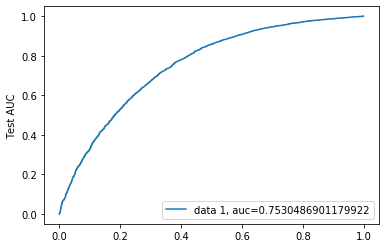

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(Y_test,  model_history)
auc = roc_auc_score(Y_test, model_history)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
#plt.xlabel('Epochs') 
plt.ylabel('Test AUC')
plt.show()